In [5]:
# Importar librerías

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

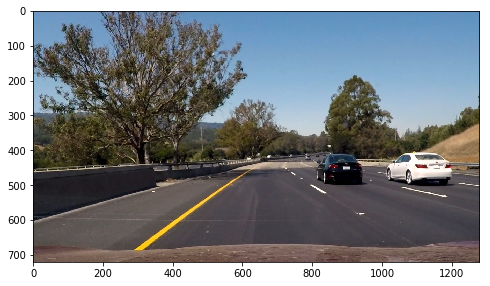

In [17]:
# Leer y mostrar la imagen
image = mpimg.imread('test6.jpg')
plt.figure(figsize=(8,6))
plt.imshow(image)
plt.show()

## 1. Espacio de colores RGB (Red, Green, Blue)

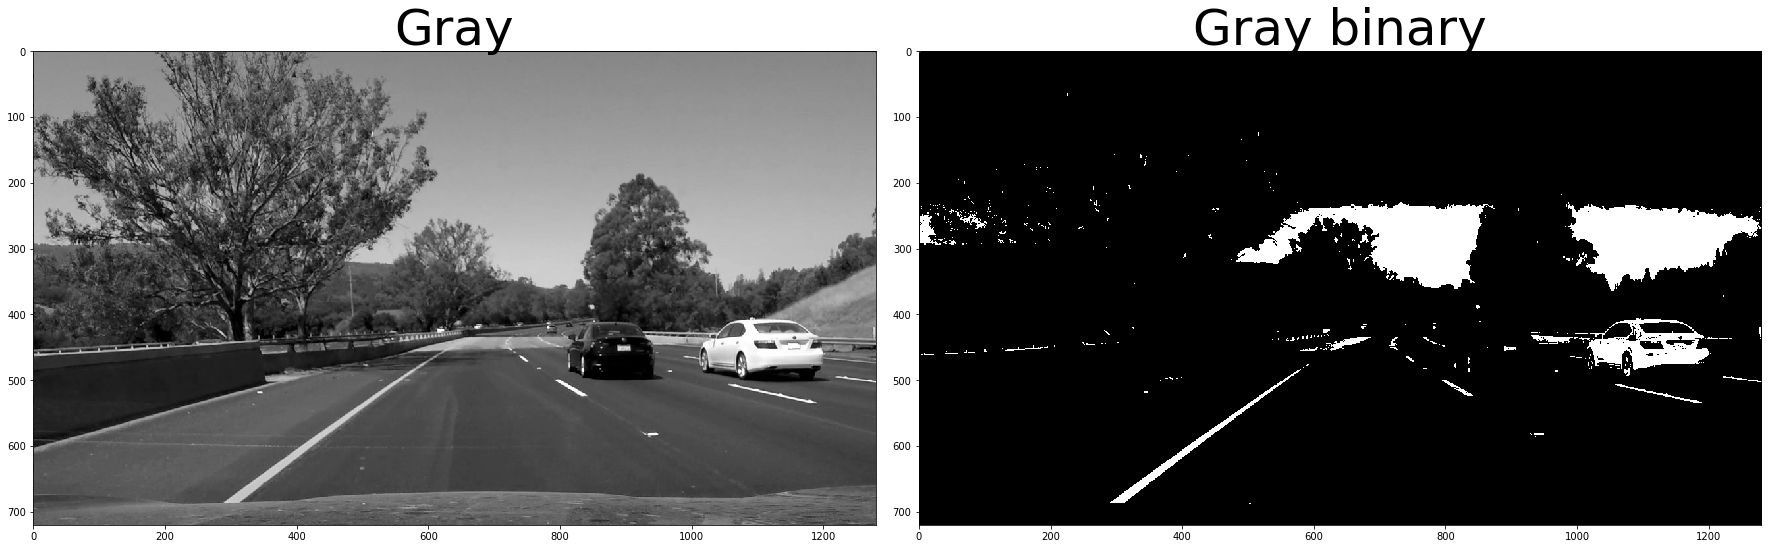

In [8]:
# Apply color threshold
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray < thresh[1])] = 1

# Plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(gray,cmap='gray')
ax1.set_title('Gray', fontsize=50)
ax2.imshow(binary, cmap='gray')
ax2.set_title('Gray binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

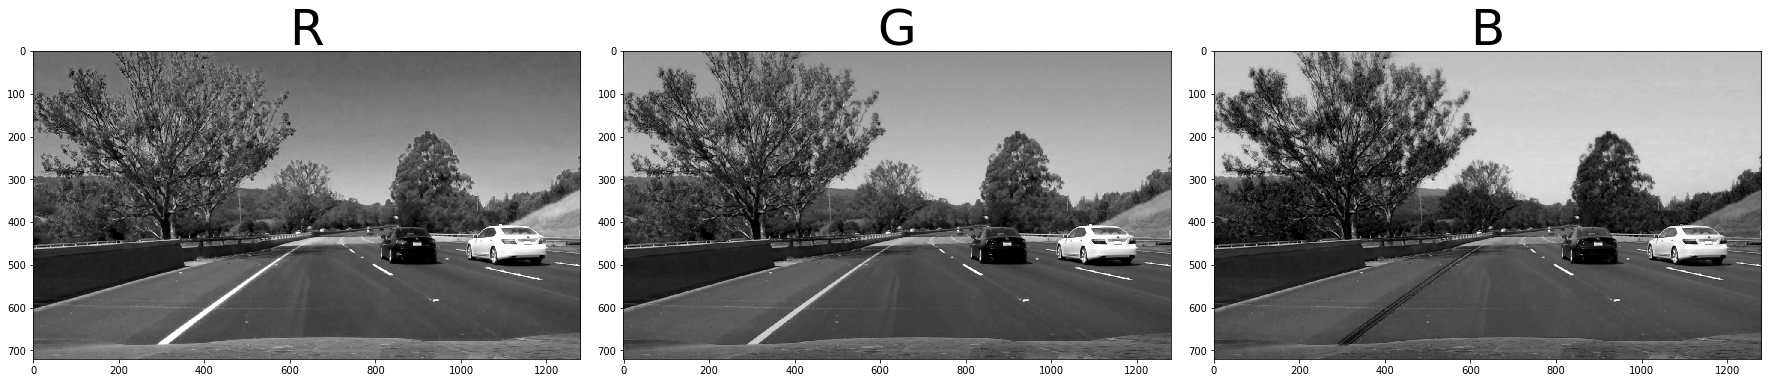

In [11]:
# Ver cada canal por separado
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

# Plots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(R,cmap='gray')
ax1.set_title('R', fontsize=50)
ax2.imshow(G,cmap='gray')
ax2.set_title('G', fontsize=50)
ax3.imshow(B,cmap='gray')
ax3.set_title('B', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)



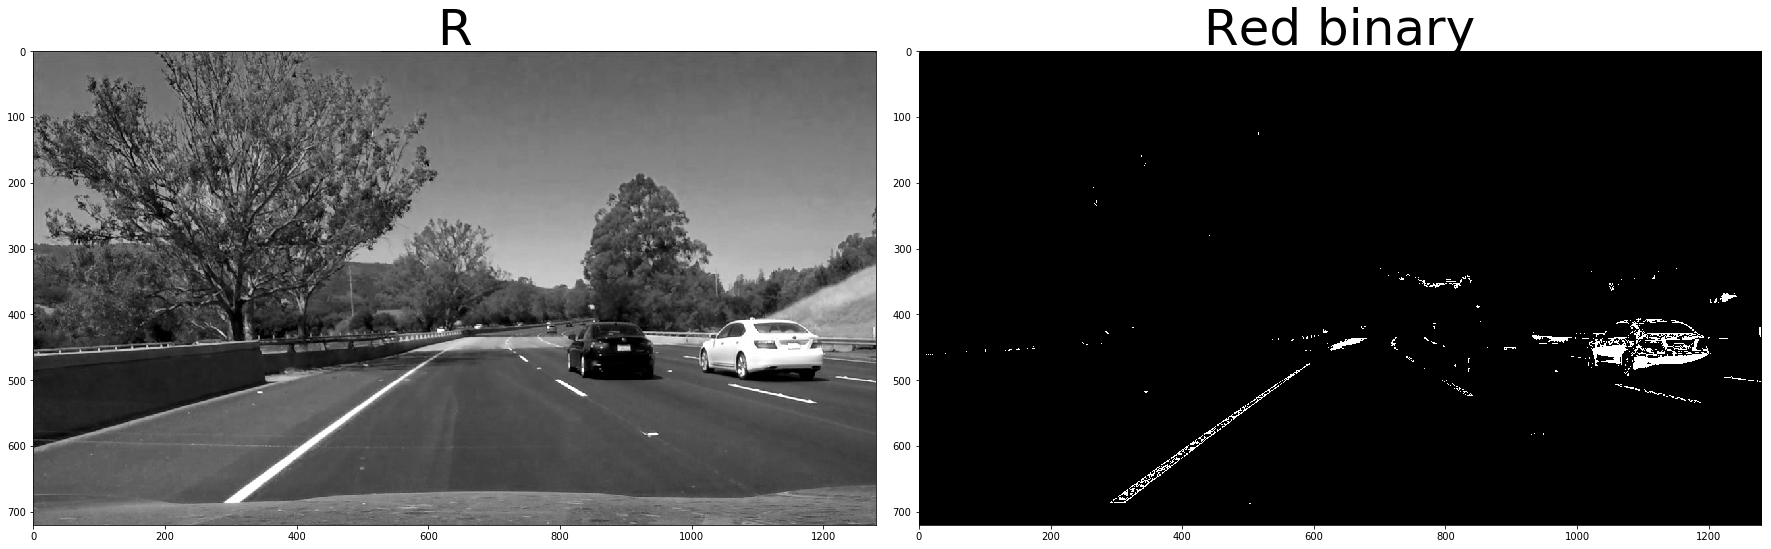

In [12]:
#The R channel does a reasonable job of highlighting the lines, 
# and you can apply a similar threshold to find lane-line pixels:

thresh = (200, 255)
binary_red = np.zeros_like(R)
binary_red[(R > thresh[0]) & (R < thresh[1])] = 1

# Plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(R,cmap='gray')
ax1.set_title('R', fontsize=50)
ax2.imshow(binary_red, cmap='gray')
ax2.set_title('Red binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## 2. Espacio de colores HLS (Hue, Lighting, Saturation)

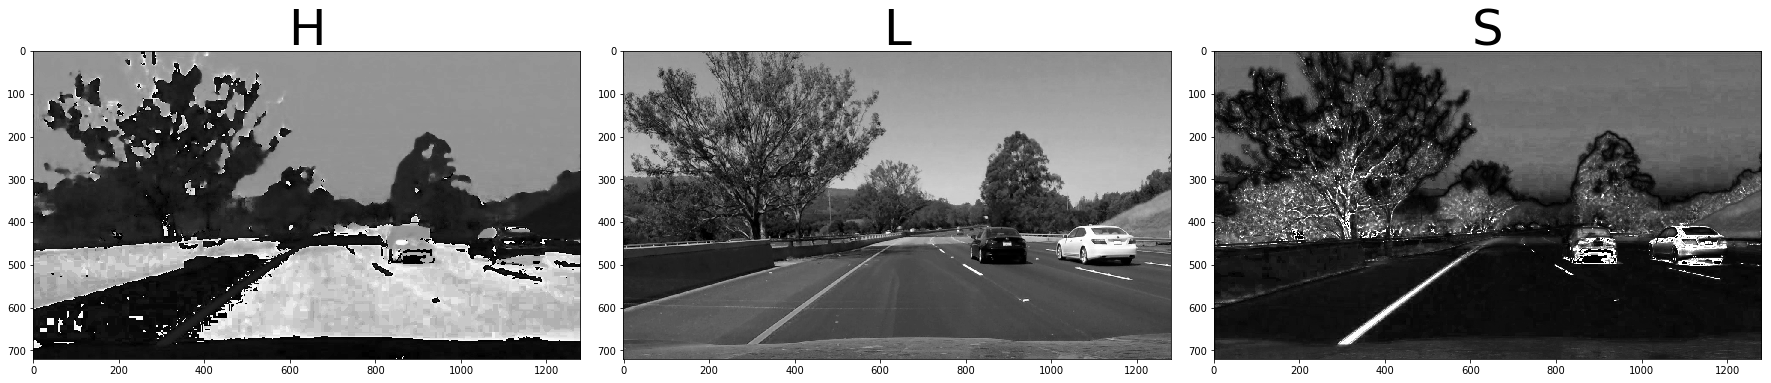

In [13]:
# Here we'll look specifically at HLS. When we separate the H, L, and S channels we get the following result:

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

# Plots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(H,cmap='gray')
ax1.set_title('H', fontsize=50)
ax2.imshow(L,cmap='gray')
ax2.set_title('L', fontsize=50)
ax3.imshow(S,cmap='gray')
ax3.set_title('S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

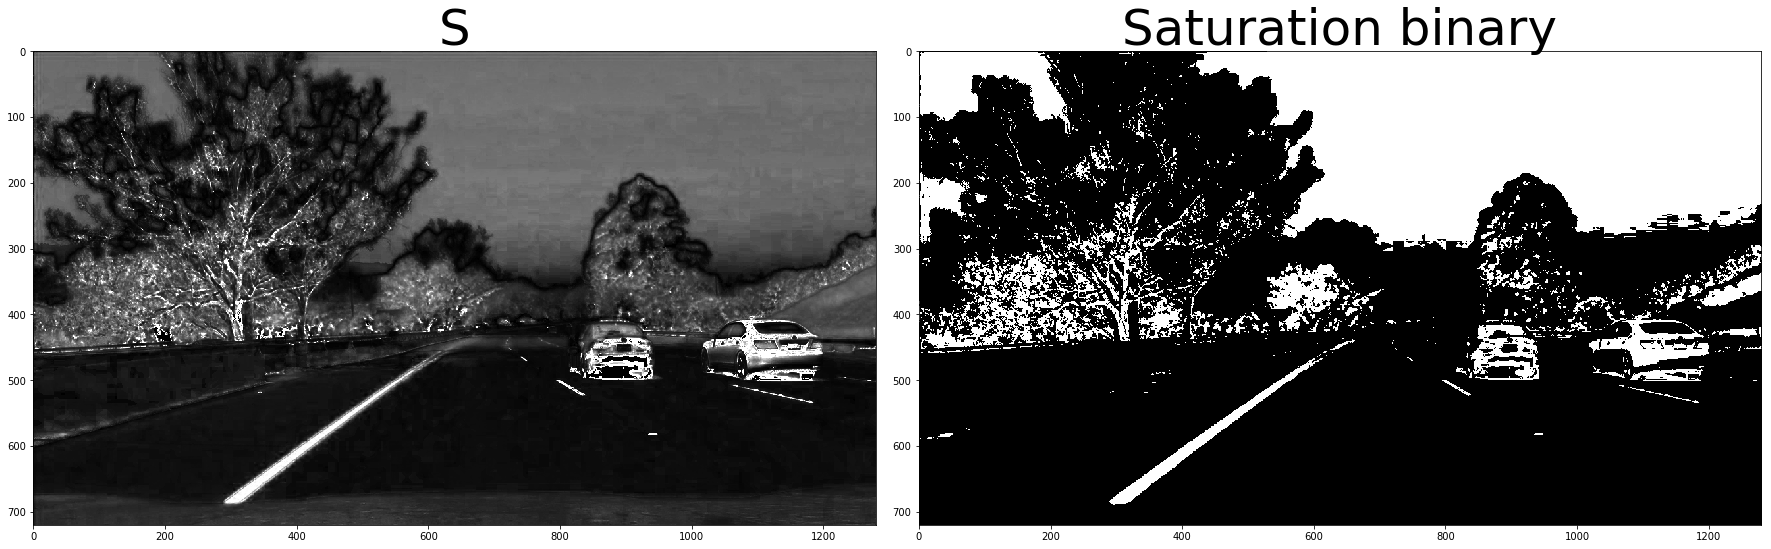

In [14]:
# The S channel picks up the lines well, so let's try applying a threshold there:

thresh = (90, 255)
binary_sat = np.zeros_like(S)
binary_sat[(S > thresh[0]) & (S <= thresh[1])] = 1

# Plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(S,cmap='gray')
ax1.set_title('S', fontsize=50)
ax2.imshow(binary_sat, cmap='gray')
ax2.set_title('Saturation binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


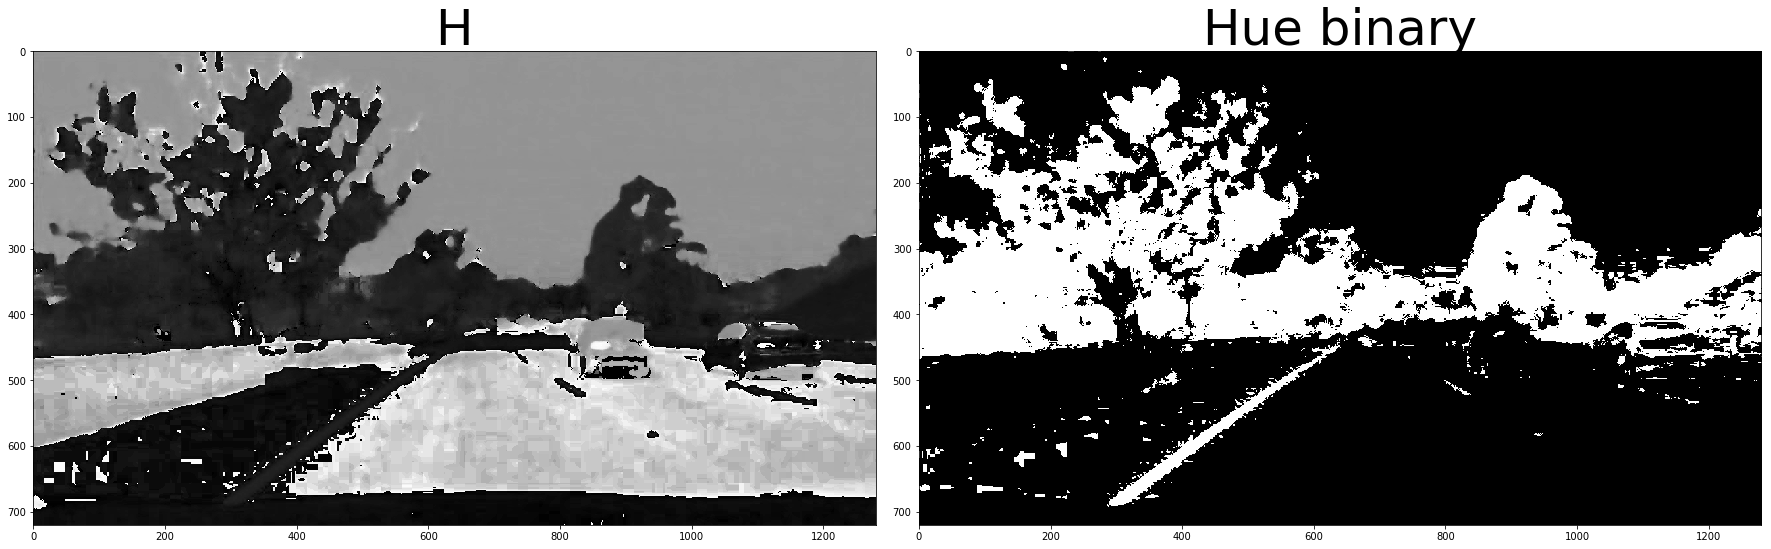

In [15]:
# You can also see that in the H channel, the lane lines appear dark 
# so we could try a low threshold there and obtain the following result:

thresh = (15, 100)
binary_hue = np.zeros_like(H)
binary_hue[(H > thresh[0]) & (H <= thresh[1])] = 1

# Plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(H,cmap='gray')
ax1.set_title('H', fontsize=50)
ax2.imshow(binary_hue, cmap='gray')
ax2.set_title('Hue binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)



From these examples, you can see that the **S** channel is probably your best bet. It's cleaner than the **H** channel result and a bit better than the **R** channel or simple grayscaling. But it's not clear that one method is far superior to the others.

Where we can really see a difference in results, however, is when we step to a new frame, where there are shadows and different colors in the pavement.

Look at the same thresholds applied to each of these four channels for this image:

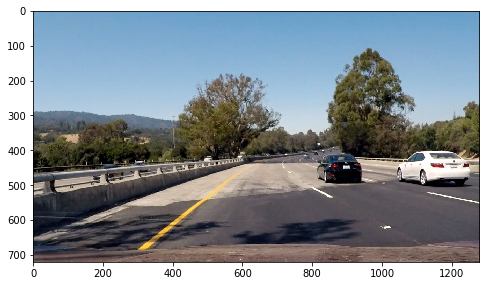

In [19]:
# Leer y mostrar la imagen
image = mpimg.imread('test4.jpg')
plt.figure(figsize=(8,6))
plt.imshow(image)
plt.show()

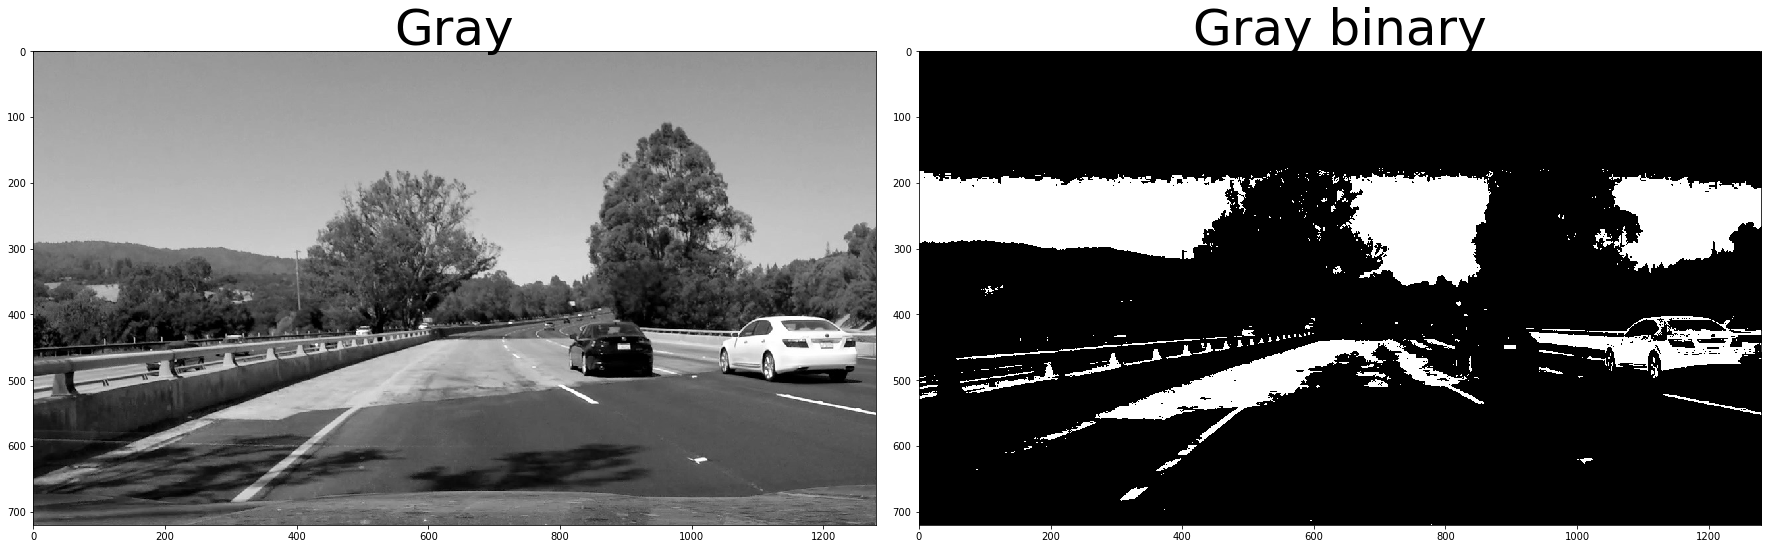

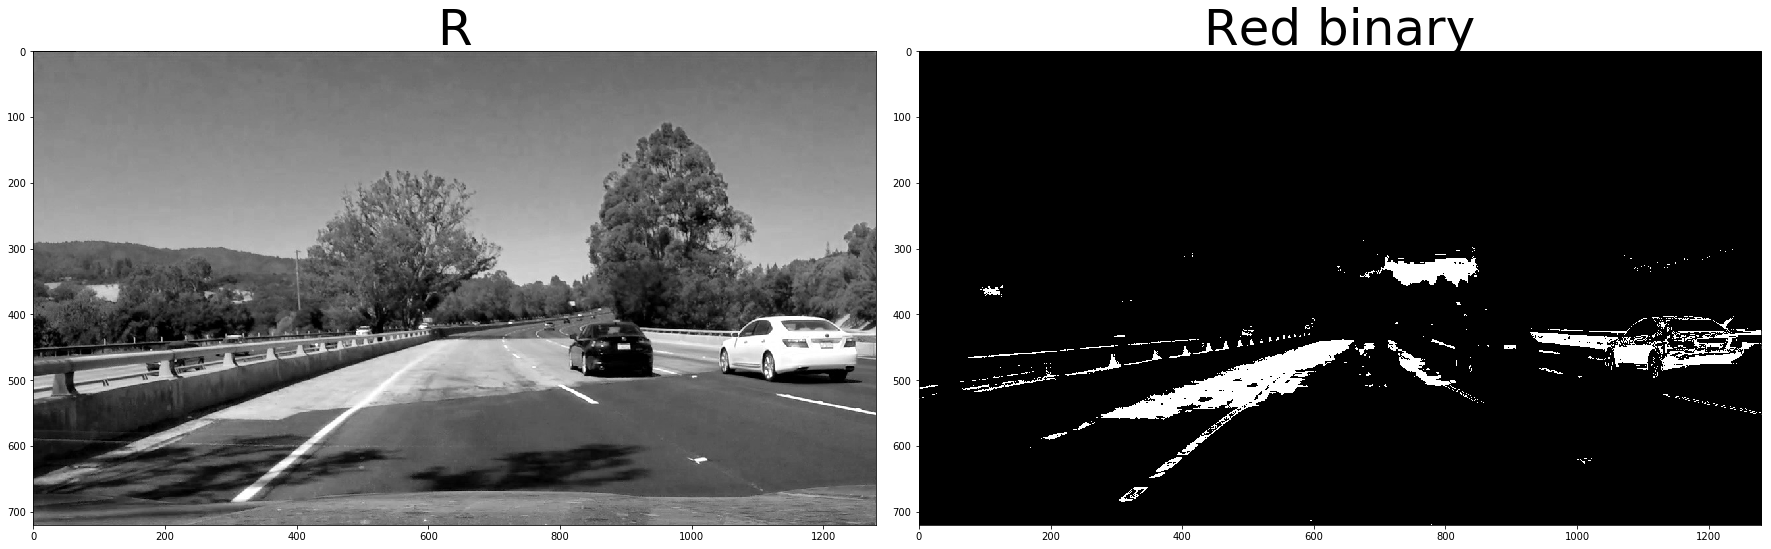

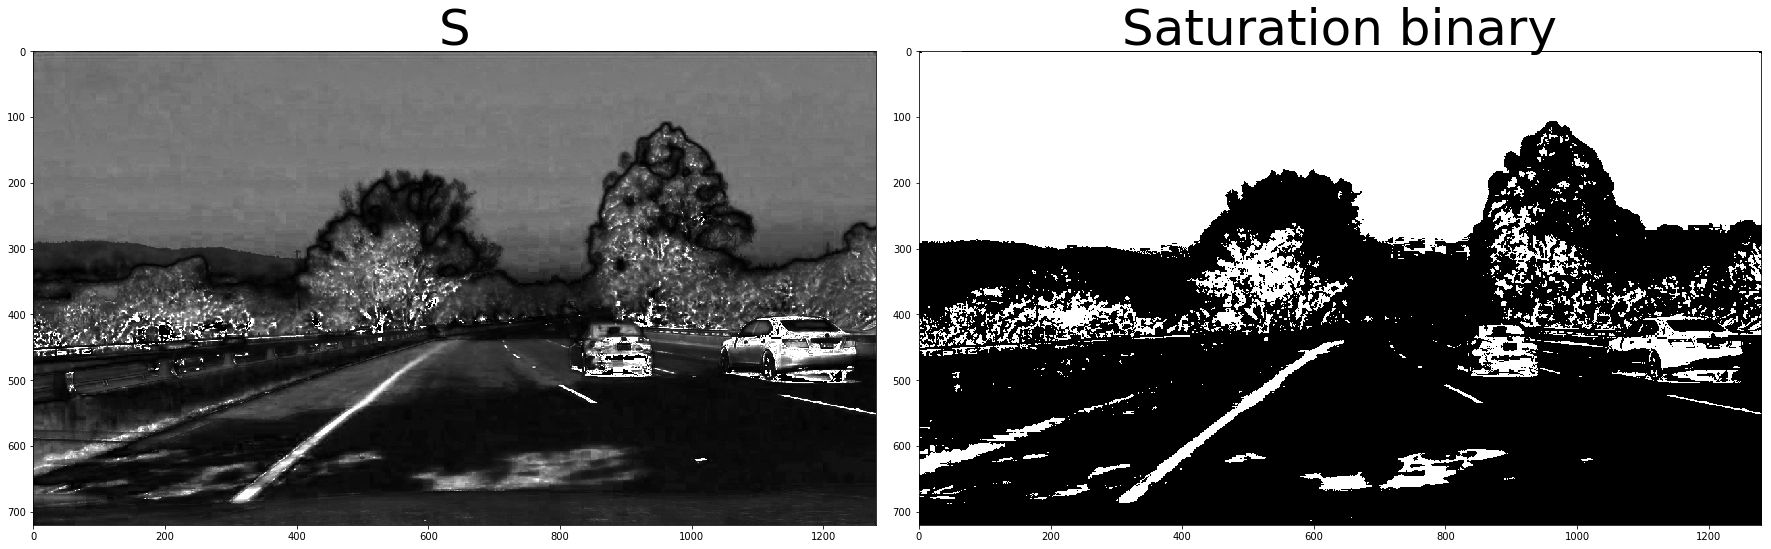

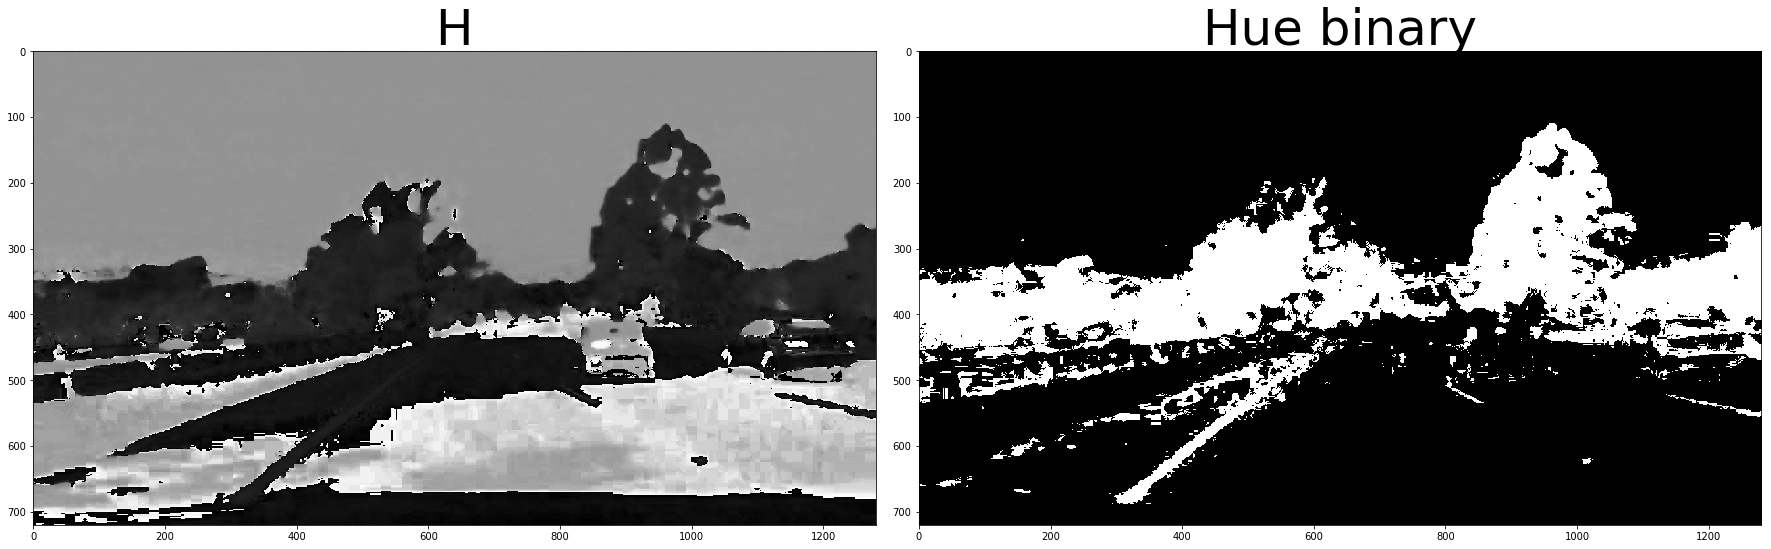

In [21]:
## Apply color threshold ##
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray < thresh[1])] = 1
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(gray,cmap='gray')
ax1.set_title('Gray', fontsize=50)
ax2.imshow(binary, cmap='gray')
ax2.set_title('Gray binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Only red channel ## 
R = image[:,:,0]
thresh = (200, 255)
binary_red = np.zeros_like(R)
binary_red[(R > thresh[0]) & (R < thresh[1])] = 1
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(R,cmap='gray')
ax1.set_title('R', fontsize=50)
ax2.imshow(binary_red, cmap='gray')
ax2.set_title('Red binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Saturation channel ##
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
S = hls[:,:,2]
thresh = (90, 255)
binary_sat = np.zeros_like(S)
binary_sat[(S > thresh[0]) & (S <= thresh[1])] = 1
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(S,cmap='gray')
ax1.set_title('S', fontsize=50)
ax2.imshow(binary_sat, cmap='gray')
ax2.set_title('Saturation binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Hue channel ##
H = hls[:,:,0]
thresh = (15, 100)
binary_hue = np.zeros_like(H)
binary_hue[(H > thresh[0]) & (H <= thresh[1])] = 1
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(H,cmap='gray')
ax1.set_title('H', fontsize=50)
ax2.imshow(binary_hue, cmap='gray')
ax2.set_title('Hue binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Now you can see that, the S channel is still doing a fairly robust job of picking up the lines under very different color and contrast conditions, while the other selections look messy. You could tweak the thresholds and get closer in the other channels, but the S channel is preferable because it is more robust to changing conditions.

It's worth noting, however, that the R channel still does rather well on the white lines, perhaps even better than the S channel. As with gradients, it's worth considering how you might combine various color thresholds to make the most robust identification of the lines.